In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/BUSA210_FinalProjectData_F25.csv'

df = pd.read_csv(file_path)

df.head()

,LoanAmount,AppraisedValue,LoanToValue_LTVratio,InterestRate,LoanTerm,LoanStatus,DenialReason,PropertyType,ConstructionMethod,OccupancyType,...,MetroArea,Race,Ethnicity,Sex,ApplicantIncome,DebtToIncomeRatio_DTI,CreditScoreType,CoApplicantCreditScoreType,LenderID,ConformingLoanStatus
0,305000,295000,NaN,5.5,360,6,10,Single Family (1-4 Units):Site-Built,1,1,...,16300,Race Not Available,Ethnicity Not Available,Sex Not Available,NaN,NaN,9,9,549300JOT0D4J0SZIK67,C
1,185000,185000,NaN,8.0,360,6,10,Single Family (1-4 Units):Site-Built,1,1,...,17140,Race Not Available,Ethnicity Not Available,Sex Not Available,NaN,NaN,9,9,549300JOT0D4J0SZIK67,C
2,205000,205000,NaN,7.125,360,6,10,Single Family (1-4 Units):Site-Built,1,1,...,16984,Race Not Available,Ethnicity Not Available,Sex Not Available,NaN,NaN,9,9,549300JOT0D4J0SZIK67,C
3,255000,255000,NaN,6.625,360,6,10,Single Family (1-4 Units):Site-Built,1,1,...,28140,Race Not Available,Ethnicity Not Available,Sex Not Available,NaN,NaN,9,9,549300JOT0D4J0SZIK67,C
4,175000,185000,NaN,7.125,360,6,10,Single Family (1-4 Units):Site-Built,1,1,...,28140,Race Not Available,Ethnicity Not Available,Sex Not Available,NaN,NaN,9,9,549300JOT0D4J0SZIK67,C


In [4]:
# ============================================
# 1. Fix data types for numeric-like columns
# ============================================

numeric_like_cols = [
    'AppraisedValue',
    'LoanToValue_LTVratio',
    'InterestRate',
    'LoanTerm',
    'CensusTract',
    'CountyCode'
]

for col in numeric_like_cols:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

print("=== Info after type fixes ===")
print(df_clean.info())
print("\n=== Missing values per column ===")
print(df_clean.isna().sum())

=== Info after type fixes ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LoanAmount                  10000 non-null  int64  
 1   AppraisedValue              9921 non-null   float64
 2   LoanToValue_LTVratio        7346 non-null   float64
 3   InterestRate                8948 non-null   float64
 4   LoanTerm                    9920 non-null   float64
 5   LoanStatus                  10000 non-null  int64  
 6   DenialReason                10000 non-null  int64  
 7   PropertyType                10000 non-null  object 
 8   ConstructionMethod          10000 non-null  int64  
 9   OccupancyType               10000 non-null  int64  
 10  ManufacturedType            10000 non-null  int64  
 11  TotalUnits                  10000 non-null  int64  
 12  CensusTract                 9998 non-null   float64
 13  Co

In [8]:
# ============================================
# 2. Parse DebtToIncomeRatio_DTI Into Numeric
# ============================================

import re

def parse_dti(val):
    """
    Convert DTI values like '30%-<36%', '50%-60%', '43', '<20%' into a numeric percentage.
    Strategy:
      - Extract all numbers.
      - If 1 number → use that.
      - If 2 numbers → use average (midpoint).
      - Otherwise → NaN.
    """
    if pd.isna(val):
        return np.nan
    try:
        # If it's a clean numeric string
        return float(val)
    except ValueError:
        s = str(val)
        nums = re.findall(r'\d+\.?\d*', s)
        if len(nums) == 0:
            return np.nan
        nums = [float(x) for x in nums]
        if len(nums) == 1:
            return nums[0]
        else:
            return sum(nums) / len(nums)

df_clean['DTI_num'] = df_clean['DebtToIncomeRatio_DTI'].apply(parse_dti)

print(df_clean['DTI_num'].describe())
print("Missing DTI_num:", df_clean['DTI_num'].isna().sum())

count    7995.000000
mean       39.315947
std        10.301752
min        20.000000
25%        33.000000
50%        40.000000
75%        46.000000
max        60.000000
Name: DTI_num, dtype: float64
Missing DTI_num: 2005


In [9]:
# ============================================
# 3. Basic Summary Tables
# ============================================

key_numeric = [
    'LoanAmount',
    'AppraisedValue',
    'LoanToValue_LTVratio',
    'InterestRate',
    'ApplicantIncome',
    'DTI_num'
]

summary_numeric = df_clean[key_numeric].describe().round(2)
print("=== Key Numeric Summary ===")
print(summary_numeric)

# Some key categorical distributions
cat_cols = ['Race', 'Ethnicity', 'Sex', 'PropertyType', 'OccupancyType', 'LoanStatus']

for col in cat_cols:
    print(f"\n=== Value Counts: {col} ===")
    print(df_clean[col].value_counts(dropna=False))

=== Key Numeric Summary ===
       LoanAmount  AppraisedValue  LoanToValue_LTVratio  InterestRate  \
count    10000.00         9921.00               7346.00       8948.00   
mean    308507.00       397222.56                 84.41          6.59   
std     257869.15       361553.98                 16.48          0.98   
min       5000.00        15000.00                  1.40          0.00   
25%     165000.00       215000.00                 80.00          6.00   
50%     255000.00       305000.00                 90.00          6.50   
75%     365000.00       445000.00                 96.50          7.00   
max    5105000.00      6365000.00                154.00         13.50   

       ApplicantIncome  DTI_num  
count          9394.00  7995.00  
mean            142.95    39.32  
std             206.62    10.30  
min              -9.00    20.00  
25%              63.00    33.00  
50%              94.00    40.00  
75%             153.00    46.00  
max            5920.00    60.00  

=== Val

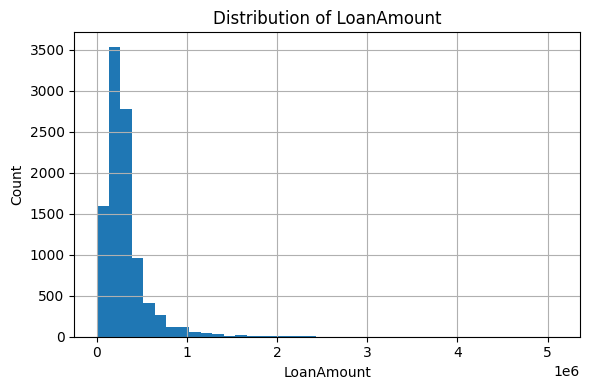

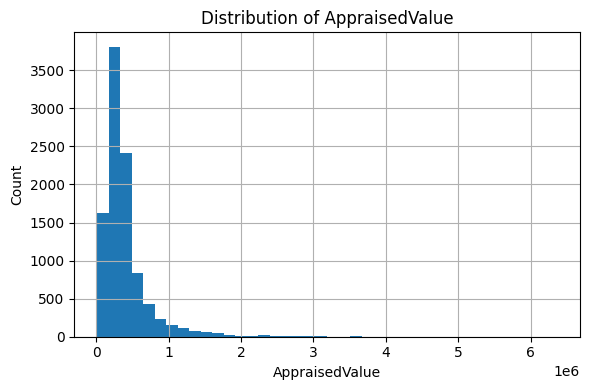

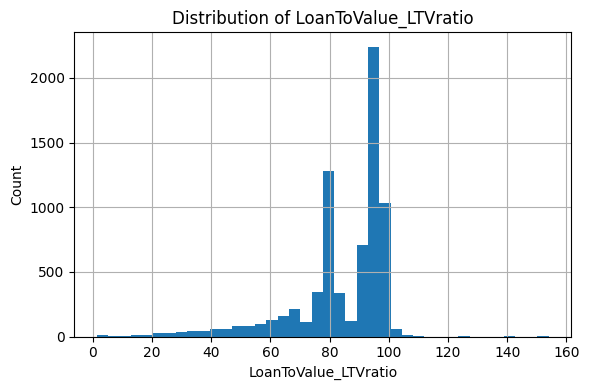

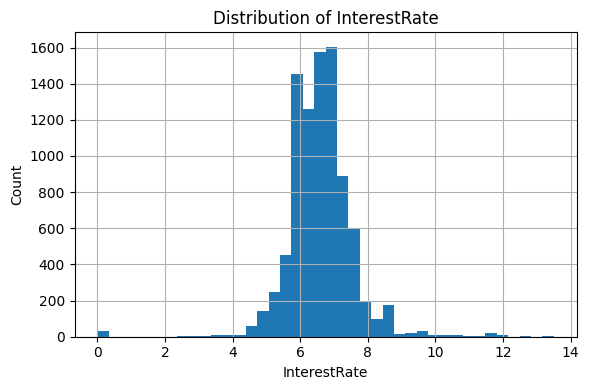

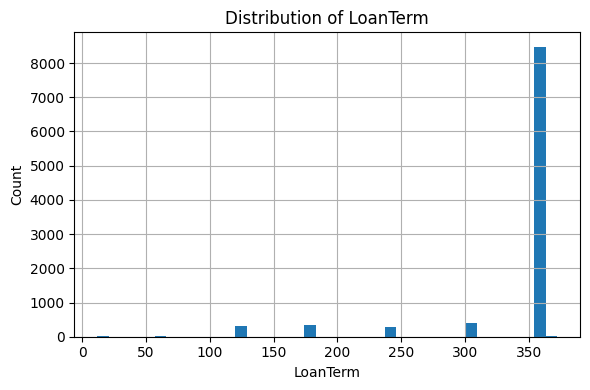

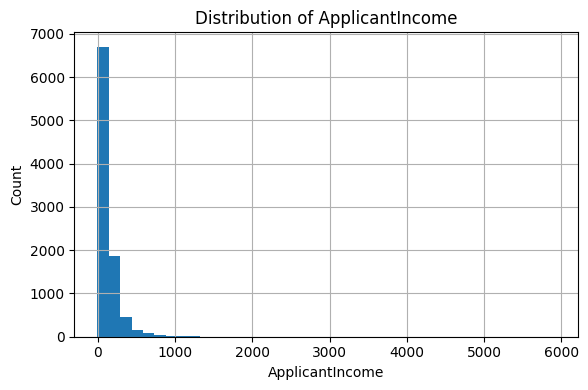

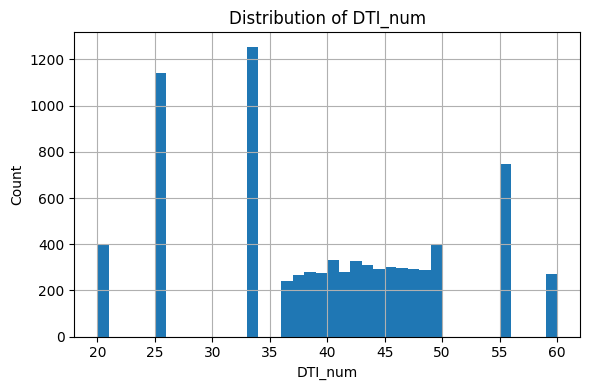

In [11]:
# ============================================
# 4. Distributions – Histograms for Numeric
# ============================================

import matplotlib.pyplot as plt

numeric_cols_for_plots = [
    'LoanAmount',
    'AppraisedValue',
    'LoanToValue_LTVratio',
    'InterestRate',
    'LoanTerm',
    'ApplicantIncome',
    'DTI_num'
]

for col in numeric_cols_for_plots:
    plt.figure(figsize=(6,4))
    df_clean[col].dropna().hist(bins=40)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

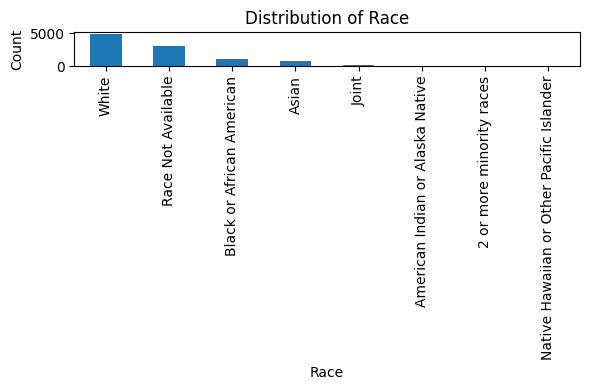

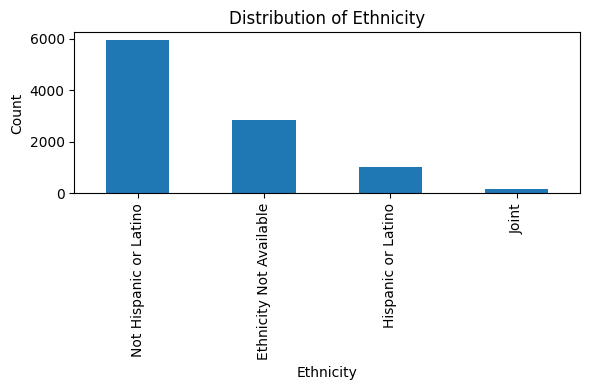

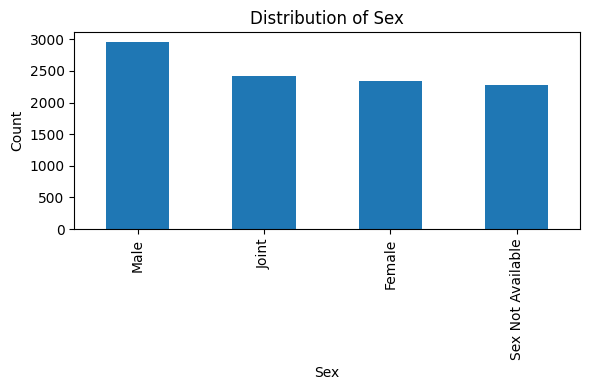

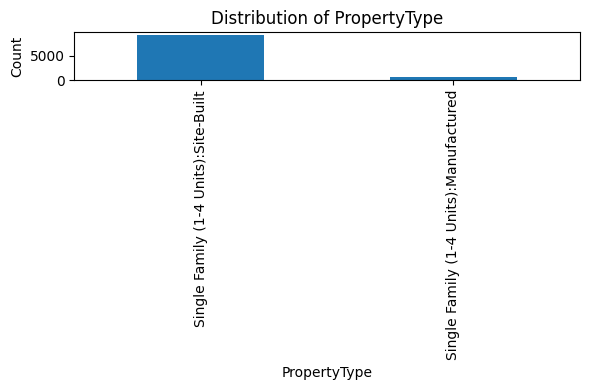

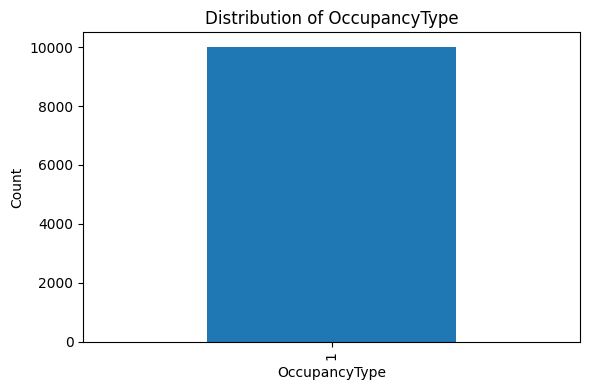

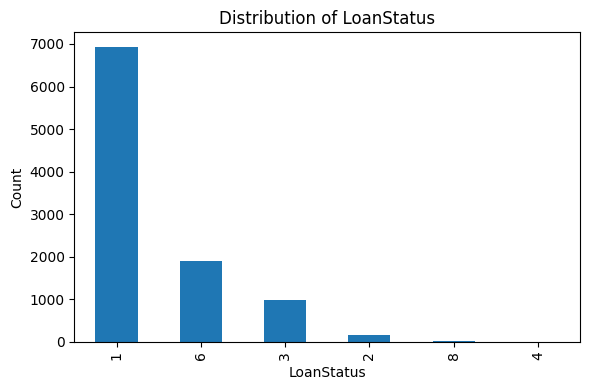

In [12]:
# ============================================
# 5. Distributions – Bar Charts for Categoricals
# ============================================

cat_cols_for_plots = ['Race', 'Ethnicity', 'Sex', 'PropertyType', 'OccupancyType', 'LoanStatus']

for col in cat_cols_for_plots:
    plt.figure(figsize=(6,4))
    df_clean[col].value_counts(dropna=False).plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

=== Correlations with LoanAmount ===
LoanAmount              1.000000
AppraisedValue          0.911814
ApplicantIncome         0.644030
LoanToValue_LTVratio    0.015106
DTI_num                -0.132581
InterestRate           -0.183383
Name: LoanAmount, dtype: float64


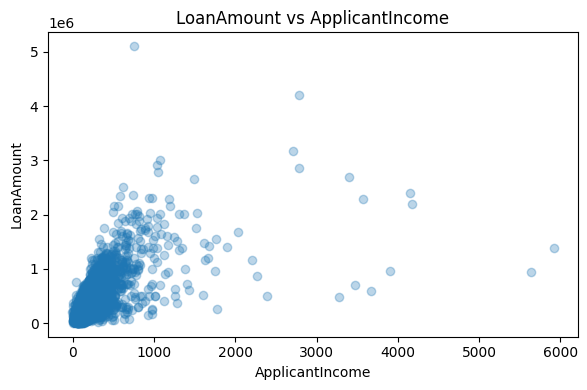

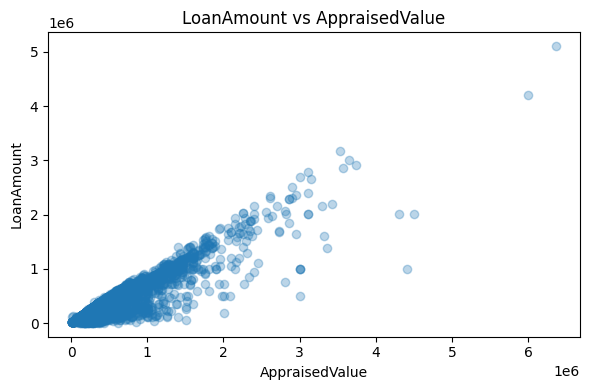

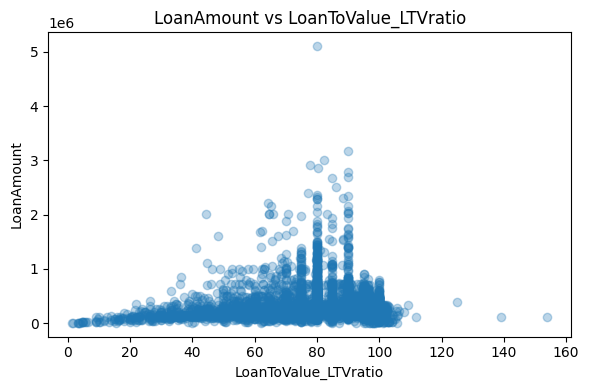

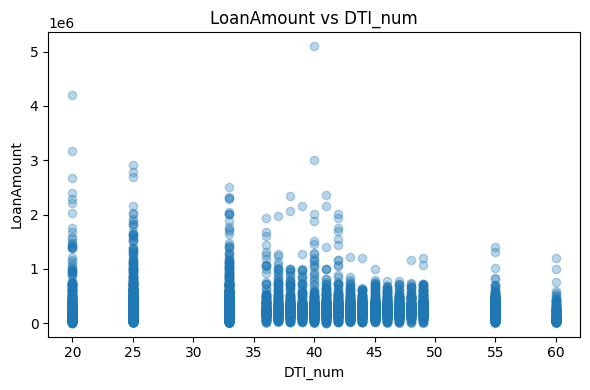

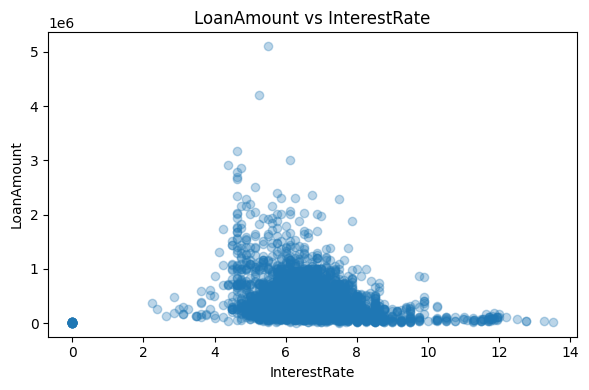

In [13]:
# ============================================
# 6. Relationships with LoanAmount – Correlations & Scatter Plots
# ============================================

# Numeric correlation with LoanAmount
rel_num_cols = ['AppraisedValue', 'ApplicantIncome', 'DTI_num',
                'LoanToValue_LTVratio', 'InterestRate', 'LoanAmount']

corrs = df_clean[rel_num_cols].corr()['LoanAmount'].sort_values(ascending=False)
print("=== Correlations with LoanAmount ===")
print(corrs)

# Scatter plots: LoanAmount vs key numeric variables
pairs = [
    ('ApplicantIncome', 'LoanAmount'),
    ('AppraisedValue', 'LoanAmount'),
    ('LoanToValue_LTVratio', 'LoanAmount'),
    ('DTI_num', 'LoanAmount'),
    ('InterestRate', 'LoanAmount')
]

for x, y in pairs:
    plt.figure(figsize=(6,4))
    plt.scatter(df_clean[x], df_clean[y], alpha=0.3)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'{y} vs {x}')
    plt.tight_layout()
    plt.show()

In [14]:
# ============================================
# 7. Grouped Averages: LoanAmount vs Race/Ethnicity/Sex/PropertyType/OccupancyType
# ============================================

loan_by_race = df_clean.groupby('Race')['LoanAmount'].mean().sort_values(ascending=False).round(0)
loan_by_eth = df_clean.groupby('Ethnicity')['LoanAmount'].mean().sort_values(ascending=False).round(0)
loan_by_sex = df_clean.groupby('Sex')['LoanAmount'].mean().sort_values(ascending=False).round(0)
loan_by_prop = df_clean.groupby('PropertyType')['LoanAmount'].mean().sort_values(ascending=False).round(0)
loan_by_occ = df_clean.groupby('OccupancyType')['LoanAmount'].mean().sort_values(ascending=False).round(0)

print("=== Avg LoanAmount by Race ===")
print(loan_by_race)
print("\n=== Avg LoanAmount by Ethnicity ===")
print(loan_by_eth)
print("\n=== Avg LoanAmount by Sex ===")
print(loan_by_sex)
print("\n=== Avg LoanAmount by PropertyType ===")
print(loan_by_prop)
print("\n=== Avg LoanAmount by OccupancyType ===")
print(loan_by_occ)

=== Avg LoanAmount by Race ===
Race
Joint                                        427756.0
Race Not Available                           347253.0
Asian                                        333863.0
White                                        295182.0
Black or African American                    229533.0
2 or more minority races                     201154.0
American Indian or Alaska Native             184310.0
Native Hawaiian or Other Pacific Islander    180000.0
Name: LoanAmount, dtype: float64

=== Avg LoanAmount by Ethnicity ===
Ethnicity
Ethnicity Not Available    359711.0
Joint                      312544.0
Not Hispanic or Latino     296140.0
Hispanic or Latino         238604.0
Name: LoanAmount, dtype: float64

=== Avg LoanAmount by Sex ===
Sex
Sex Not Available    383759.0
Joint                350713.0
Male                 276233.0
Female               232809.0
Name: LoanAmount, dtype: float64

=== Avg LoanAmount by PropertyType ===
PropertyType
Single Family (1-4 Units):Site-Bui

In [16]:
# ============================================
# 8. Build a Simple LoanAmount Prediction Model (OLS)
#    Using AppraisedValue, ApplicantIncome, InterestRate
# ============================================

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Keep only rows with all needed variables
model_df = df_clean[['LoanAmount', 'AppraisedValue', 'ApplicantIncome', 'InterestRate']].dropna()

# Scale AppraisedValue to thousands to reduce numerical issues
model_df['AppraisedValue_k'] = model_df['AppraisedValue'] / 1000

X = model_df[['AppraisedValue_k', 'ApplicantIncome', 'InterestRate']]
y = model_df['LoanAmount']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

# Compute RMSE as a simple accuracy metric
preds = model.predict(X)
rmse = mean_squared_error(y, preds)
print("\nRMSE:", rmse)

# Define the function using estimated coefficients
coef = model.params
print("\nModel Coefficients:")
print(coef)

def predict_loan_amount(appraised_value, applicant_income, interest_rate):
    """
    appraised_value: property value in dollars
    applicant_income: as in dataset's units
    interest_rate: e.g. 6.5 for 6.5%
    """
    value_k = appraised_value / 1000.0
    return (coef['const']
            + coef['AppraisedValue_k'] * value_k
            + coef['ApplicantIncome'] * applicant_income
            + coef['InterestRate'] * interest_rate)

# Example test call:
example_pred = predict_loan_amount(300000, 100, 6.5)
print("\nExample predicted LoanAmount for $300k property, income=100, rate=6.5%:", example_pred)

                            OLS Regression Results                            
Dep. Variable:             LoanAmount   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                 1.508e+04
Date:                Thu, 11 Dec 2025   Prob (F-statistic):               0.00
Time:                        00:33:25   Log-Likelihood:            -1.0838e+05
No. Observations:                8344   AIC:                         2.168e+05
Df Residuals:                    8340   BIC:                         2.168e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.715e+05   8097.758  

In [17]:
# ============================================
# 9. Scenario Analysis:
#    Policy: Only LTV < 85 AND InterestRate < 6
# ============================================

# Filter to loans with both LTV and InterestRate available
base_sample = df_clean[
    (~df_clean['LoanToValue_LTVratio'].isna()) &
    (~df_clean['InterestRate'].isna())
]

policy_mask = (base_sample['LoanToValue_LTVratio'] < 85) & (base_sample['InterestRate'] < 6)
policy_sample = base_sample[policy_mask]

base_count = base_sample.shape[0]
policy_count = policy_sample.shape[0]
policy_share = policy_count / base_count if base_count > 0 else np.nan

print(f"Total loans with LTV & Rate: {base_count}")
print(f"Loans meeting LTV<85 & Rate<6%: {policy_count}")
print(f"Policy share of portfolio: {policy_share:.3%}")

# Compare average LoanAmount, AppraisedValue, Income, DTI
compare_means = pd.DataFrame({
    'All_loans': base_sample[['LoanAmount', 'AppraisedValue', 'ApplicantIncome', 'DTI_num']].mean(),
    'Policy_subset': policy_sample[['LoanAmount', 'AppraisedValue', 'ApplicantIncome', 'DTI_num']].mean()
})

print("\n=== Mean Comparison: All vs Policy Subset ===")
print(compare_means.round(2))

# Outcome distribution (LoanStatus) – normalized (proportions)
outcome_all = base_sample['LoanStatus'].value_counts(normalize=True)
outcome_policy = policy_sample['LoanStatus'].value_counts(normalize=True)

print("\n=== LoanStatus Distribution: All Loans ===")
print(outcome_all)
print("\n=== LoanStatus Distribution: Policy Subset ===")
print(outcome_policy)

# Race & Ethnicity composition
race_all = base_sample['Race'].value_counts(normalize=True)
race_policy = policy_sample['Race'].value_counts(normalize=True)

eth_all = base_sample['Ethnicity'].value_counts(normalize=True)
eth_policy = policy_sample['Ethnicity'].value_counts(normalize=True)

print("\n=== Race Share: All Loans ===")
print(race_all)
print("\n=== Race Share: Policy Subset ===")
print(race_policy)

print("\n=== Ethnicity Share: All Loans ===")
print(eth_all)
print("\n=== Ethnicity Share: Policy Subset ===")
print(eth_policy)

Total loans with LTV & Rate: 6893
Loans meeting LTV<85 & Rate<6%: 777
Policy share of portfolio: 11.272%

=== Mean Comparison: All vs Policy Subset ===
                 All_loans  Policy_subset
LoanAmount       316835.20      438655.08
AppraisedValue   407128.25      640675.68
ApplicantIncome     146.46         255.43
DTI_num              38.51          34.17

=== LoanStatus Distribution: All Loans ===
LoanStatus
1    0.987233
2    0.010736
8    0.002031
Name: proportion, dtype: float64

=== LoanStatus Distribution: Policy Subset ===
LoanStatus
1    0.993565
2    0.006435
Name: proportion, dtype: float64

=== Race Share: All Loans ===
Race
White                                        0.628464
Race Not Available                           0.122733
Black or African American                    0.119542
Asian                                        0.104164
Joint                                        0.019585
American Indian or Alaska Native             0.003047
2 or more minority races    